In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as stats

In [2]:
ticker_dic = {'United_States':'^GSPC','India':'^NSEI'}

# Download data : Change Adj Close to Returns

In [3]:
def download_data(ticker):
    data = yf.download(ticker, start , end )['Adj Close']
    returns = data.pct_change()[1:]
    returns = np.log(1+returns)
    return returns

# Descripitive Data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


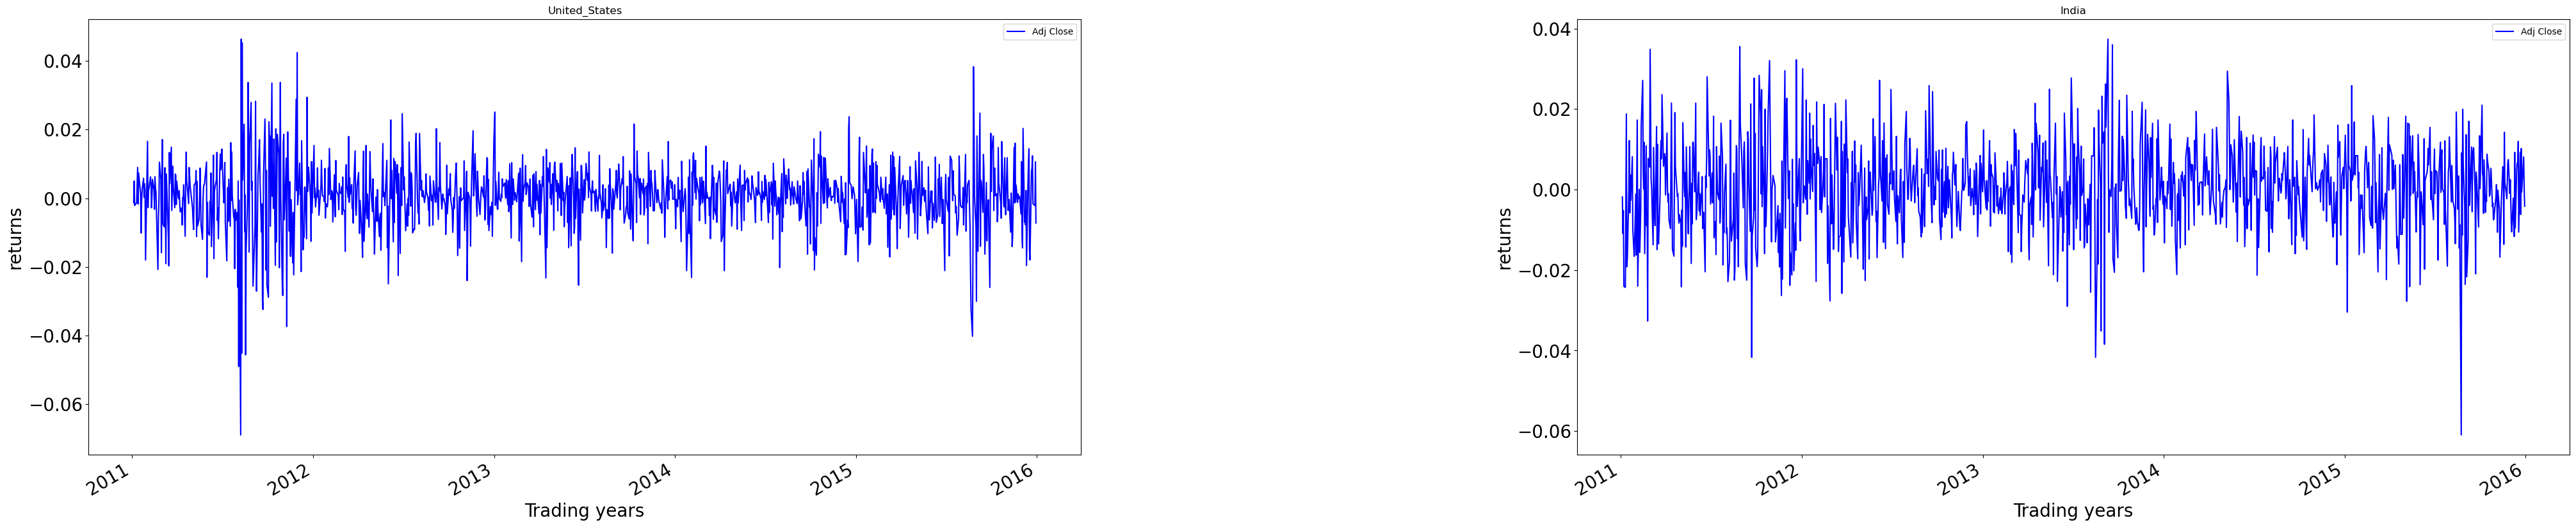

In [4]:
start= '2011-01-01'
end = '2015-12-31'

fig_width = 50
fig_height = 10

keys = list(ticker_dic.keys())
values = list(ticker_dic.values())

fig, axs = plt.subplots(nrows=1, ncols=len(keys), figsize=(fig_width, fig_height))
for i, key in enumerate(keys):
    returns = download_data(values[i])
    returns = pd.DataFrame(returns)
    ax = axs[i]
    returns.plot(ax=ax, color='b', title=key, fontsize=20)
    ax.set_ylabel('returns', fontsize=20)
    ax.set_xlabel('Trading years', fontsize=20)
plt.subplots_adjust(wspace=0.5)
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


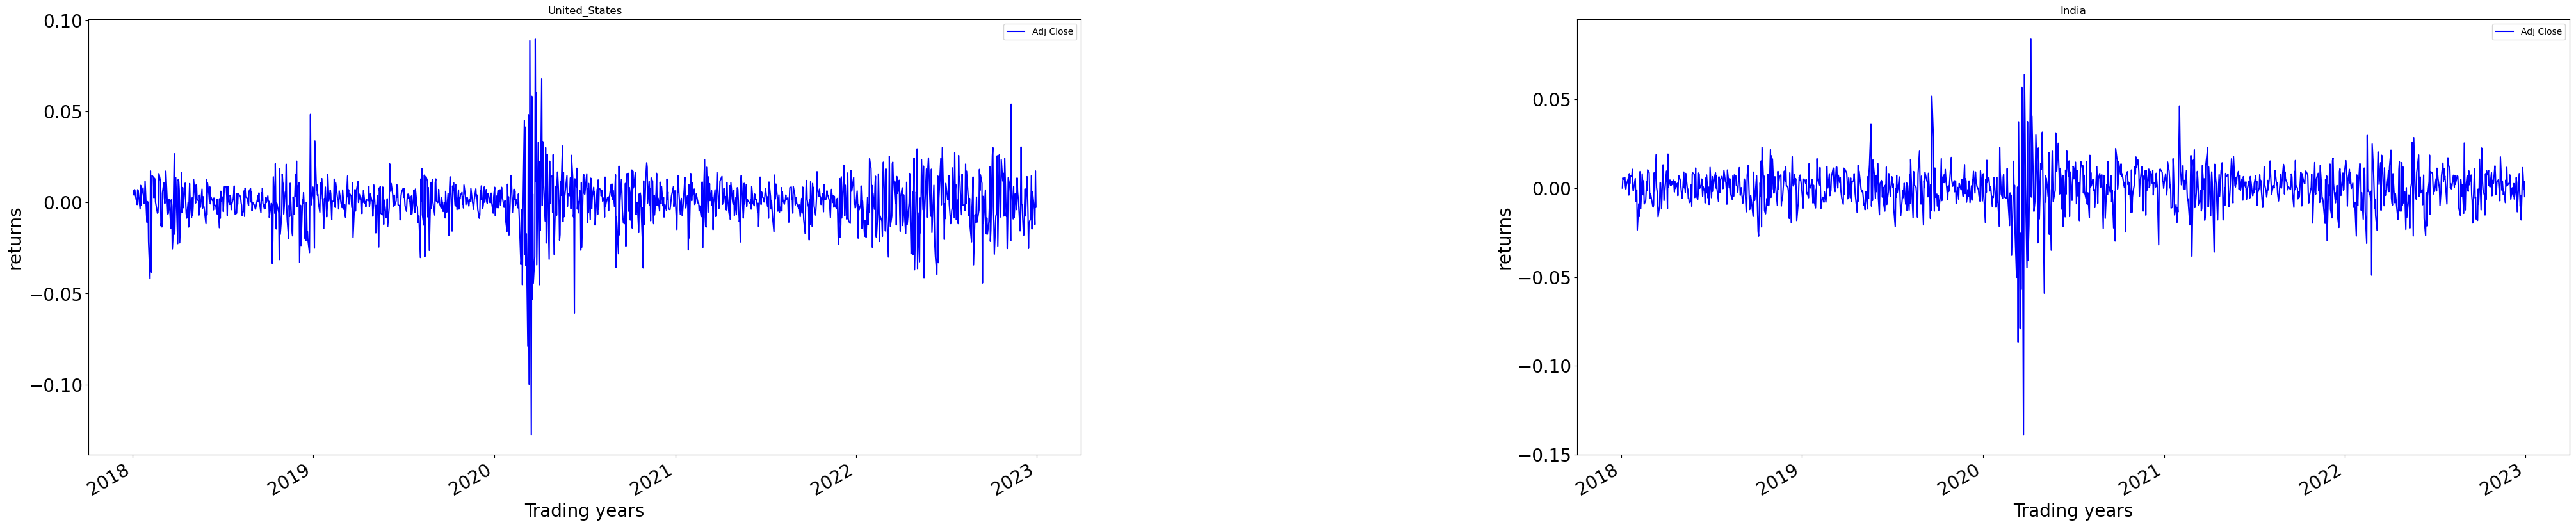

In [5]:
start= '2018-01-01'
end = '2022-12-31'

fig_width = 50
fig_height = 10

keys = list(ticker_dic.keys())
values = list(ticker_dic.values())

fig, axs = plt.subplots(nrows=1, ncols=len(keys), figsize=(fig_width, fig_height))
for i, key in enumerate(keys):
    returns = download_data(values[i])
    returns = pd.DataFrame(returns)
    ax = axs[i]
    returns.plot(ax=ax, color='b', title=key, fontsize=20)
    ax.set_ylabel('returns', fontsize=20)
    ax.set_xlabel('Trading years', fontsize=20)
plt.subplots_adjust(wspace=0.5)
plt.show()


In [6]:
start= '2011-01-01'
end = '2015-12-31'
for i, key in enumerate(keys):
    returns = download_data(values[i])
    returns = pd.DataFrame(returns).dropna()
    statistics = returns.describe()
    statistics.to_csv("statistics.csv")
    skewness = returns.skew()
    kurtosis = returns.kurtosis()
    print(statistics)
    print('Skewness:', skewness)
    print('Kurtosis:', kurtosis)

[*********************100%***********************]  1 of 1 completed
         Adj Close
count  1256.000000
mean      0.000385
std       0.009756
min      -0.068958
25%      -0.004001
50%       0.000546
75%       0.005274
max       0.046317
Skewness: Adj Close   -0.50783
dtype: float64
Kurtosis: Adj Close    4.93825
dtype: float64
[*********************100%***********************]  1 of 1 completed
         Adj Close
count  1213.000000
mean      0.000205
std       0.010767
min      -0.060973
25%      -0.006029
50%       0.000154
75%       0.006330
max       0.037380
Skewness: Adj Close   -0.153535
dtype: float64
Kurtosis: Adj Close    1.528082
dtype: float64


In [7]:
start= '2018-01-01'
end = '2022-12-31'
for i, key in enumerate(keys):
    returns = download_data(values[i])
    returns = pd.DataFrame(returns).dropna()
    statistics = returns.describe()
    statistics.to_csv(f'file_{i}.csv', index=False)
    skewness = returns.skew()
    kurtosis = returns.kurtosis()
    print(statistics)
    print('Skewness:', skewness)
    print('Kurtosis:', kurtosis)

[*********************100%***********************]  1 of 1 completed
         Adj Close
count  1258.000000
mean      0.000281
std       0.013836
min      -0.127652
25%      -0.005326
50%       0.000851
75%       0.007046
max       0.089683
Skewness: Adj Close   -0.791536
dtype: float64
Kurtosis: Adj Close    12.948027
dtype: float64
[*********************100%***********************]  1 of 1 completed
         Adj Close
count  1231.000000
mean      0.000447
std       0.012364
min      -0.139038
25%      -0.005073
50%       0.000820
75%       0.007049
max       0.084003
Skewness: Adj Close   -1.51639
dtype: float64
Kurtosis: Adj Close    20.038306
dtype: float64


# Variance Ratio Test 

In [8]:
def variance_ratio_test(ticker):
    returns = download_data(ticker)
    max_t = 64
    n = len(returns)
    var0 = returns.var()
    variance_ratio_output = pd.DataFrame()
    for t in np.arange(2,max_t+1):
        variance = returns.rolling(t).sum().var()
        variance_ratio = variance/(t*var0)-1
        standard_error = (2*(2*t-1)*(t-1)/(3*t*n))**(1/2)
        
        z_stat= variance_ratio/standard_error
        p_value = 2*(1-sps.norm.cdf(abs(z_stat)))
        variance_ratio_output[t] = [round(var0,6), round (variance,6), round(variance_ratio,6), round(z_stat,6), p_value]
        variance_ratio_output
        
    min_p_value = min(variance_ratio_output.iloc[4])
    Chow_Denning = 1 - (1-min_p_value )**(max_t-1)
    max_z_stat = variance_ratio_output.iloc[3][variance_ratio_output.iloc[4] == min_p_value].values[0]
    statistic_output = pd.DataFrame()
    statistic_output = [Chow_Denning , min_p_value, max_z_stat]
    for key, value in ticker_dic.items():
        if value == ticker:
            ticker_key = key
    if Chow_Denning > 0.05:
        print(ticker_key + ticker +' '+'market is efficient')
    elif max_z_stat > 0:
        print(ticker_key + ticker +' '+'market is trending (persistent)')
    else:
        print(ticker_key + ticker +' '+'market is mean-reverting(antipersistent)')
    

    plt.plot(variance_ratio_output.iloc[3], label =ticker)
    plt.legend(fontsize=8)
    plt.xlabel("time window")
    plt.ylabel("z_stat")
    
    return variance_ratio_output, statistic_output

[*********************100%***********************]  1 of 1 completed
United_States^GSPC market is efficient
[0.2968403225718038, 0.005574425160025598, -2.771818]
[*********************100%***********************]  1 of 1 completed
India^NSEI market is efficient
[0.08376682577075101, 0.0013876773901604356, 3.197202]


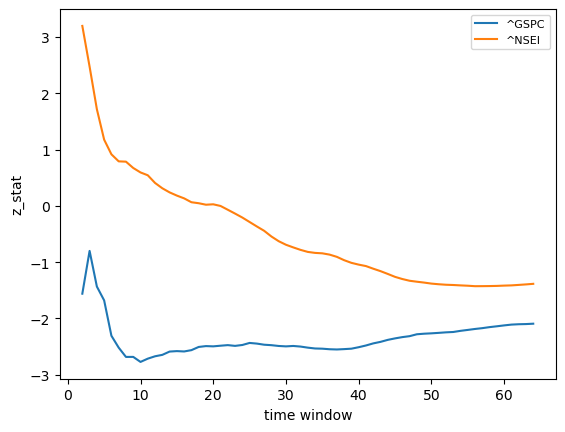

In [9]:
start= '2011-01-01'
end = '2015-12-31'
for k in ticker_dic.keys():
    variance_ratio_output, statistic_output = variance_ratio_test(ticker_dic[k])
    print(statistic_output)

[*********************100%***********************]  1 of 1 completed
United_States^GSPC market is mean-reverting(antipersistent)
[1.004111194191637e-08, 1.5938272923676777e-10, -6.396112]
[*********************100%***********************]  1 of 1 completed
India^NSEI market is efficient
[0.9939822663131952, 0.07795332897478646, -1.762687]


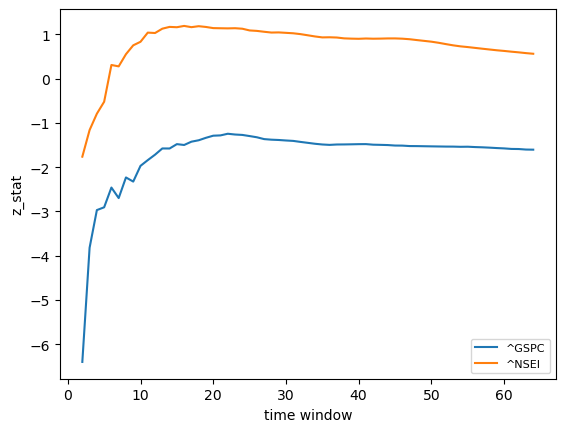

In [10]:
start= '2018-01-01'
end = '2022-12-31'
for k in ticker_dic.keys():
    variance_ratio_output, statistic_output = variance_ratio_test(ticker_dic[k])
    print(statistic_output)

# Runs test 

In [11]:
def Runs_test(ticker):
    returns = download_data(ticker)
    returns =returns.drop(returns[returns == 0].index)
    returns = returns.to_numpy()
    n = len(returns)
    signs = np.sign(returns)
    runs = signs[1:] - signs[:-1]
    observed_runs = np.count_nonzero(runs ==2) + np.count_nonzero(runs == -2) + 1
    positive_returns = np.count_nonzero(signs == 1)
    negative_returns = np.count_nonzero(signs == -1)
 
    expected_runs = 2*positive_returns*negative_returns/n + 1
    stdev_runs = (expected_runs*(expected_runs - 1)/(n-1))**(1/2)
    z_stat = (observed_runs - expected_runs)/stdev_runs
    p_value = 2*(1-sps.norm.cdf(abs(z_stat)))
    
    for key, value in ticker_dic.items():
        if value == ticker:
            ticker_key = key
    if p_value > 0.05:
        print('positive:',positive_returns,'negative:',negative_returns,
              ticker_key + ticker +' '+'market is efficient')
    elif z_stat > 0:
        print('positive:',positive_returns,'negative:',negative_returns,
              ticker_key + ticker +' '+'market is mean-reverting(antipersistent)')
    else:
        print('positive:',positive_returns,'negative:',negative_returns,
              ticker_key + ticker +' '+'market is trending (persistent))')
    return print('observed_runs:',observed_runs,'expected_runs:',int(expected_runs),'stdev_runs',round(stdev_runs,2),'z_stat',round(z_stat,3),'p_value',round(p_value,5))

In [12]:
start= '2011-01-01'
end = '2015-12-31'
for k in ticker_dic.keys():
    Runs_test(ticker_dic[k])

[*********************100%***********************]  1 of 1 completed
positive: 679 negative: 577 United_States^GSPC market is efficient
observed_runs: 635 expected_runs: 624 stdev_runs 17.62 z_stat 0.575 p_value 0.56499
[*********************100%***********************]  1 of 1 completed
positive: 617 negative: 595 India^NSEI market is trending (persistent))
observed_runs: 549 expected_runs: 606 stdev_runs 17.42 z_stat -3.318 p_value 0.00091


In [13]:
start= '2018-01-01'
end = '2022-12-31'
for k in ticker_dic.keys():
    Runs_test(ticker_dic[k])

[*********************100%***********************]  1 of 1 completed
positive: 677 negative: 581 United_States^GSPC market is efficient
observed_runs: 644 expected_runs: 626 stdev_runs 17.65 z_stat 1.001 p_value 0.31701
[*********************100%***********************]  1 of 1 completed
positive: 668 negative: 563 India^NSEI market is trending (persistent))
observed_runs: 550 expected_runs: 612 stdev_runs 17.44 z_stat -3.557 p_value 0.00038


# 2011-2015 Autocorrelation Test

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


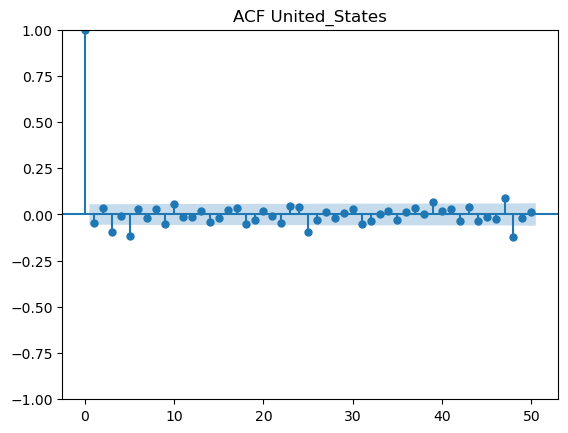

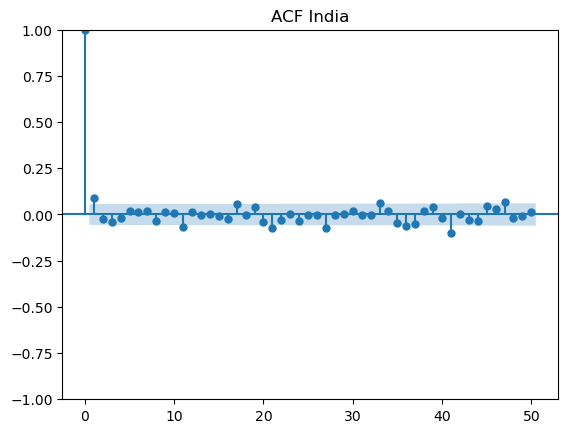

In [17]:
start= '2011-01-01'
end = '2015-12-31'
for k in ticker_dic.keys():
    returns = download_data(ticker_dic[k])
    stats.graphics.tsa.plot_acf(returns,use_vlines=True,lags=50, title = 'ACF '+ k )

# 2018-2022 Autocorrelation Test

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


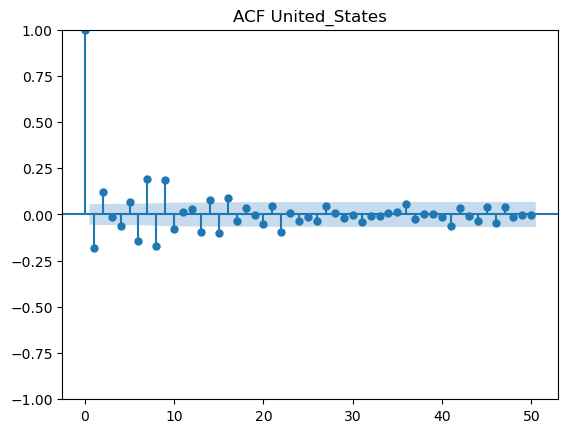

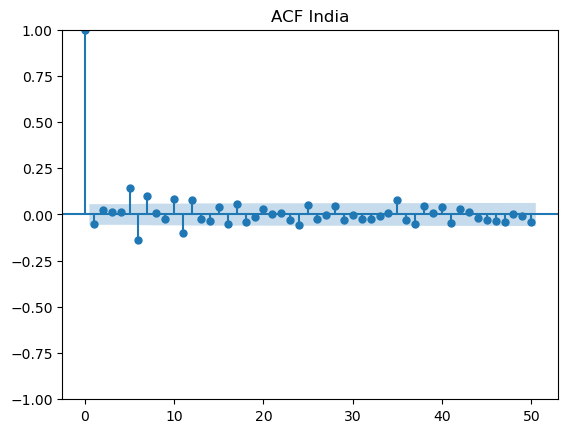

In [18]:
start= '2018-01-01'
end = '2022-12-31'
for k in ticker_dic.keys():
    returns = download_data(ticker_dic[k])
    stats.graphics.tsa.plot_acf(returns,use_vlines=True,lags=50, title = 'ACF '+ k )

# Test on Individual Stock

In [24]:
def Runs_test_individual(ticker):
    price= np.array(yf.download(ticker, start,end)['Adj Close'])
    returns = price[1:]/price[:-1]-1
    returns = returns[returns !=0]
    returns = np.log(1+returns)
    n = len(returns)
    signs = np.sign(returns)
    runs = signs[1:] - signs[:-1]
    observed_runs = np.count_nonzero(runs ==2) + np.count_nonzero(runs == -2) + 1
    positive_returns = np.count_nonzero(signs == 1)
    negative_returns = np.count_nonzero(signs == -1)
 
    expected_runs = 2*positive_returns*negative_returns/n + 1
    stdev_runs = (expected_runs*(expected_runs - 1)/(n-1))**(1/2)
    z_stat = (observed_runs - expected_runs)/stdev_runs
    p_value = 2*(1-sps.norm.cdf(abs(z_stat)))

    if p_value > 0.05:
        print(ticker +' '+'stock is efficient')
    elif z_stat > 0:
        print(ticker +' '+'stock is mean-reverting(antipersistent)')
    else:
        print(ticker +' '+'stock is trending (persistent))')
    return print(observed_runs,int(expected_runs),round(stdev_runs,2),round(z_stat,3),round(p_value,5))

In [25]:
def variance_ratio_test_individual(ticker):
    returns = download_data(ticker)
    max_t = 64
    n = len(returns)
    var0 = returns.var()
    variance_ratio_output = pd.DataFrame()
    for t in np.arange(2,max_t+1):
        variance = returns.rolling(t).sum().var()
        variance_ratio = variance/(t*var0)-1
        standard_error = (2*(2*t-1)*(t-1)/(3*t*n))**(1/2)
        
        z_stat= variance_ratio/standard_error
        p_value = 2*(1-sps.norm.cdf(abs(z_stat)))
        variance_ratio_output[t] = [round(var0,6), round (variance,6), round(variance_ratio,6), round(z_stat,6), p_value]
        variance_ratio_output
        
    min_p_value = min(variance_ratio_output.iloc[4])
    Chow_Denning = 1 - (1-min_p_value )**(max_t-1)
    max_z_stat = variance_ratio_output.iloc[3][variance_ratio_output.iloc[4] == min_p_value].values[0]
    statistic_output = pd.DataFrame()
    statistic_output = [Chow_Denning , min_p_value, max_z_stat]

    if Chow_Denning > 0.05:
        print(ticker +' '+'stock is efficient')
    elif max_z_stat > 0:
        print(ticker +' '+'stock is trending (persistent)')
    else:
        print(ticker +' '+'stock is mean-reverting(antipersistent)')
    

    plt.plot(variance_ratio_output.iloc[3], label =ticker)
    plt.legend(loc='upper right',fontsize=8)
    plt.xlabel("time window")
    plt.ylabel("z_stat")
    
    return variance_ratio_output, statistic_output

In [26]:
start= '2011-01-01'
end = '2015-12-31'

[*********************100%***********************]  1 of 1 completed
AAPL stock is efficient


(         2         3         4         5         6         7         8   \
 0  0.000282  0.000282  0.000282  0.000282  0.000282  0.000282  0.000282   
 1  0.000574  0.000861  0.001133  0.001420  0.001675  0.001947  0.002214   
 2  0.016075  0.016694  0.003281  0.006022 -0.011078 -0.014594 -0.019550   
 3  0.569707  0.396891  0.062161  0.097411 -0.158814 -0.189763 -0.234229   
 4  0.568876  0.691448  0.950435  0.922400  0.873815  0.849495  0.814808   
 
          9         10        11  ...        55        56        57        58  \
 0  0.000282  0.000282  0.000282  ...  0.000282  0.000282  0.000282  0.000282   
 1  0.002447  0.002666  0.002914  ...  0.015167  0.015521  0.015847  0.016203   
 2 -0.037014 -0.055455 -0.061423  ... -0.023109 -0.018164 -0.015141 -0.010367   
 3 -0.413288 -0.582080 -0.610177  ... -0.096961 -0.075511 -0.062375 -0.042326   
 4  0.679395  0.560513  0.541745  ...  0.922758  0.939808  0.950264  0.966239   
 
          59        60        61        62        63  

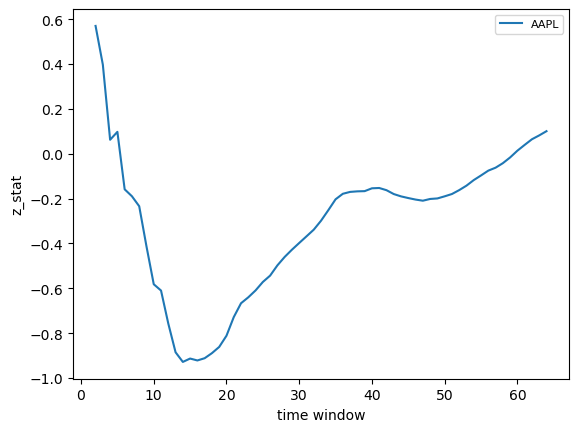

In [27]:
variance_ratio_test_individual('AAPL')

In [28]:
Runs_test_individual('AAPL')

[*********************100%***********************]  1 of 1 completed
AAPL stock is efficient
622 628 17.72 -0.342 0.73213
